<a href="https://colab.research.google.com/github/viniciusgcjr/linkedin_posts/blob/main/daily_tasks_python%20/Daily_tasks_python_INTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slack

[Tutorial - How to send a Slack message in Python using webhooks](https://practicaldatascience.co.uk/data-science/how-to-send-a-slack-message-in-python-using-webhooks)

In [ ]:
import requests
import json

In [ ]:
def send_slack_message(payload, webhook):
    """Send a Slack message to a channel via a webhook.

    Args:
        payload (dict): Dictionary containing Slack message, i.e. {"text": "This is a test"}
        webhook (str): Full Slack webhook URL for your chosen channel.

    Returns:
        HTTP response code, i.e. <Response [503]>
    """

    return requests.post(webhook, json.dumps(payload))

In [ ]:
webhook = "<TOKEN SLACK>"
mensagem = 'Seja bem-vindo!'
payload = {"text": mensagem}
send_slack_message(payload, webhook)

# Extracting Google Forms Answers

In [ ]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Greetings (anwsers)').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()


#From Google Sheets to Pandas
answers = pd.DataFrame.from_records(rows)
answers.columns = answers.iloc[0]
answers.drop(answers.index[0], inplace = True)
answers

,Date/Hour,What's your background?,Have you ever studied any programming languages?,What's your github email?
1,28/06/2023 14:28:38,Meteorology,Yes,viniciusjr@mail88.com.br
2,28/06/2023 14:38:38,Geography,No,spenser_villalobos90@dailytaskspython.com.br
3,28/06/2023 14:48:38,Administration,Yes,roderick_ayala88@dailytaskspython.com.br
4,28/06/2023 14:58:38,Biology,Yes,malcolm-walls12@dailytaskspython.com.br
5,28/06/2023 15:08:38,Computer Science,No,weaver_quincy99@dailytaskspython.com.br
6,28/06/2023 15:18:38,Computer Science,Yes,contreras-lisette19@dailytaskspython.com.br
7,28/06/2023 15:28:38,Meteorology,No,raheem_fink17@dailytaskspython.com.br
8,28/06/2023 15:38:38,Geography,Yes,wanda_woods42@dailytaskspython.com.br
9,28/06/2023 15:48:38,Computer Science,No,hurtado-lawanda88@dailytaskspython.com.br
10,28/06/2023 15:58:38,Administration,Yes,camp_trenten35@dailytaskspython.com.br


<Axes: title={'center': 'studied any programming languages'}>

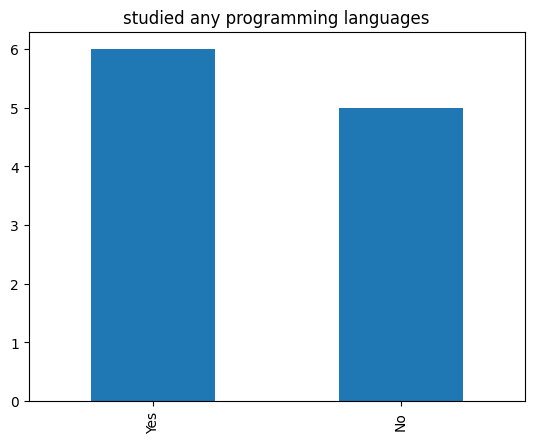

In [ ]:
answers['Have you ever studied any programming languages?'].value_counts().plot(kind='bar', title='studied any programming languages')

In [ ]:
answers["What's your github email?"].values

array(['viniciusjr@mail88.com.br',
       'spenser_villalobos90@dailytaskspython.com.br',
       'roderick_ayala88@dailytaskspython.com.br',
       'malcolm-walls12@dailytaskspython.com.br',
       'weaver_quincy99@dailytaskspython.com.br',
       'contreras-lisette19@dailytaskspython.com.br',
       'raheem_fink17@dailytaskspython.com.br',
       'wanda_woods42@dailytaskspython.com.br',
       'hurtado-lawanda88@dailytaskspython.com.br',
       'camp_trenten35@dailytaskspython.com.br',
       'denton-terese57@dailytaskspython.com.br'], dtype=object)

## Writing in Google Sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1AEkYLkPK67mcWzj2o4q2bK0vjL8kN7wa36F1nnsbu30',
 'updatedRange': "'Página1'!A1:C2",
 'updatedRows': 2,
 'updatedColumns': 3,
 'updatedCells': 6}

# Requesting Data From API

In [ ]:
import json
import pandas as pd
import requests

In [ ]:
def retrieve_data_inmet(br_state):
  response = requests.get(f'https://apitempo.inmet.gov.br/estacao/diaria/2020-01-01/2020-12-30/{br_state}')
  data = json.loads(response.text)
  df = pd.json_normalize(data)
  return df

In [ ]:
recife = retrieve_data_inmet("A301")
recife

# FTP

[Referência](https://docs.python.org/pt-br/3.7/library/ftplib.html#module-ftplib)

In [ ]:
import pandas as pd
import ftplib
import os

ftp = ftplib.FTP('<address>', '<user>', '<password>')
dir = 'APAC'
ftp.cwd(dir)

for i in range(1, 6):
  estacao = dir + str(i).zfill(2)
  ftp.cwd(estacao)

  arquivo = estacao + '.csv'

  pathdst = './'

  with open(pathdst + os.sep + arquivo, 'wb') as file:
    ftp.retrbinary("daily.dat", file.write)

  ftp.cwd('../')

In [ ]:
import glob

filesglob = glob.glob('APAC*.csv')
filesglob

['APAC04.csv', 'APAC05.csv', 'APAC03.csv', 'APAC01.csv', 'APAC02.csv']

In [ ]:
df_header = pd.read_csv('APAC01.csv', skiprows=1, header=0, encoding = "ISO-8859-1", delimiter=',').head()
df_header.head()

,TIMESTAMP,RECORD,Enc_RH_Min,Enc_RH_TMn,BattV_Min,ChgInV_Min,ChgInV_TMn,ChgInI_Min,ChgInI_TMn,BP_mbar,...,Vel_Vento_S_WVT_10,Dir_Vento_D1_WVT_10,Dir_Vento_SD1_WVT_10,Wind_Direction_10,Wind_Speed_10_Max,Wind_Speed_10_TMx,Wind_Speed_10_Min,Wind_Speed_10_TMn,ETos,Rso
0,TS,RN,%,NaN,Volts,V,NaN,A,NaN,mbar,...,m/s,Deg,Deg,Deg,m/s,NaN,m/s,NaN,mm,MJ/m²
1,NaN,NaN,Min,TMn,Min,Min,TMn,Min,TMn,Smp,...,WVc,WVc,WVc,Smp,Max,TMx,Min,TMn,ETXs,Rso
2,2019-07-25 00:00:00,110,63.66,2019-07-24 15:47:00,12.62,0.047,2019-07-24 02:46:30,0,2019-07-24 00:00:30,616.9,...,3.702,146,19.88,178,9.2,2019-07-24 08:02:00,0.5,2019-07-24 15:27:30,8.16,3.331
3,2019-07-26 00:00:00,111,55.66,2019-07-25 14:25:00,12.57,0.048,2019-07-25 02:52:00,0,2019-07-25 00:00:30,500,...,3.662,137.3,22.14,124,10.5,2019-07-25 12:44:30,0.4,2019-07-25 04:03:30,19.68,3.34
4,2019-07-27 00:00:00,112,63.13,2019-07-26 15:15:00,12.64,0.047,2019-07-26 05:51:00,0,2019-07-26 00:00:30,722.6,...,3.622,135.7,22.94,141,9.2,2019-07-26 14:12:00,0.5,2019-07-26 07:24:30,13.25,3.343


# SQL

[Referência](https://docs.python.org/pt-br/3.7/library/sqlite3.html#module-sqlite3)

In [ ]:
import sqlite3
conn = sqlite3.connect('example.db')

In [ ]:
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE stocks
             (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
c.execute("INSERT INTO stocks VALUES ('2020-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.


In [ ]:
conn = sqlite3.connect('example.db')
c = conn.cursor()
c.execute("SELECT * FROM stocks")
print(c.fetchall())
conn.commit()
conn.close()

[('2020-01-05', 'BUY', 'RHAT', 100.0, 35.14)]


# Working with PDF and Word Files

## Downloading PDF from a website

In [1]:
import requests

def download_pdf(url, file_name):

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(response.content)
    else:
        print(response.status_code)

In [2]:
download_pdf('https://github.com/viniciusgcjr/linkedin_posts/blob/bbe6b81b1e239cae25380e972517d54b422cebc1/daily_tasks_python/', 'water quality reservoirs.pdf')
download_pdf('https://github.com/viniciusgcjr/linkedin_posts/blob/bbe6b81b1e239cae25380e972517d54b422cebc1/daily_tasks_python/', 'water quality report.pdf')

In [3]:
download_pdf('https://www.apac.pe.gov.br/uploads/Boletim-Pluviometrico-29-09-2022.pdf', 'boletim_chuva_29.pdf')

In [4]:
url = 'https://www.apac.pe.gov.br/uploads/Boletim-Pluviometrico-30-09-2022.pdf'
arquivo = 'boletim_chuva_30.pdf'
download_pdf(url, arquivo)


## PDF

### Extrair Informações

In [ ]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
import PyPDF2


In [ ]:
pdfFileObj = open('/content/water quality reservoirs.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)
len(pdfReader.pages)

2

In [ ]:
pageObj = pdfReader.pages[0]
text_from_pdf = pageObj.extract_text()
text_from_pdf

'Laboratório Prof. Adaucto da Silva Teixeira \nRelatório de Ensaios Físico-Químicos e Bacteriológicos\nData de Emissão: 17/08/2022 Relatório Nº : 2022.0126 Página: 1/1\nInformações Gerais\nCliente: CPRH – AGÊNCIA ESTADUAL DE MEIO AMBIENTE \nPrograma: Monitoramento dos Reservatórios e Mananciais\nLocal de coleta: Reservatório da Bacia do Rio Tejipió\nPonto de coleta:  Barragem - Superfície\nResponsável pela coleta: APAC\nResultados de campo e Laboratório\n \nCódigo Ponto de Coleta TJ-2300\nAmostra Nº 0978.2022\nData da Coleta 13/07/2022\nHora da Coleta 12:00\nData de Recebimento 13/07/2022\nChuva nas últimas 24 horas Sim\nAspecto da Água T\nDetritos e Materiais Flutuantes A\nÓleos e Graxas (campo) NDV\nVegetação Aquática na Superfície VA\nCondições de Tempo ENC\nSinais de Poluição por Esgoto A\nResíduos Sólidos A\nTemperatura do Ar (ºC) 27.6\nTemperatura da água (ºC) 27.1\nColiformes Termotolerantes (NMP/100mL) 1700\nClorofila  a(µg/L) ND\npH (potenciométrico) 7.21\nTurbidez (UT) 4.46\n

### Regular Expressions

[Referência](https://docs.python.org/3/library/re.html)

## Renaming file based on its content

In [ ]:
import re

codigo = re.findall('(Código Ponto de Coleta) (?P<Code>\w{2}-\d{2})', text_from_pdf)
print(codigo[0][1])
data_coleta = re.findall('(Data da Coleta) (?P<Data>\d{2}\/\d{2}\/\d{4})', text_from_pdf)
print(data_coleta[0][1])

TJ-23
13/07/2022


In [ ]:
import shutil
shutil.move('/content/water quality report.pdf', f'/content/Reservatorio_{codigo[0][1]}.pdf')

'/content/Reservatorio_TJ-23.pdf'

### Extracting content from tables

In [ ]:
pip install -q tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 83.4 MB/s eta 0:00:00


In [ ]:
import tabula

#tabula.environment_info()

In [ ]:
pdf_path = "/content/Reservatorio_TJ-23.pdf"

dfs = tabula.read_pdf(pdf_path)
print(len(dfs))
dfs[0].to_csv('teste.csv')

1


In [ ]:
with open('teste.csv', 'r') as file:
    content = file.read()
    print(content)


,Táxons identificados,Cels.mL-1
0,CRYPTOPHYTA,
1,Cryptomonas sp.,157.0
2,Sub_total,157.0
3,TOTAL,157.0



### Combining PDFs

In [ ]:
import PyPDF2

pdf1File = open('/content/Boletim-Pluviometrico-29.pdf', 'rb')
pdf2File = open('/content/Boletim-Pluviometrico-30.pdf', 'rb')

pdf1Reader = PyPDF2.PdfReader(pdf1File)
pdf2Reader = PyPDF2.PdfReader(pdf2File)
pdfWriter = PyPDF2.PdfWriter()

for pageNum in range(len(pdf1Reader.pages) - 3 ): #slicing pages
  pageObj = pdf1Reader.pages[pageNum]
  pdfWriter.add_page (pageObj)
for pageNum in range(len(pdf2Reader.pages) - 2):
  pageObj = pdf2Reader.pages[pageNum]
  pdfWriter.add_page (pageObj)

pdfOutputFile = open('merged_reports.pdf', 'wb')
pdfWriter.write(pdfOutputFile)
pdfOutputFile.close()
pdf1File.close()
pdf2File.close()

### WORD

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=1094cc5a669dca9a88428e8212fbb1e407de840a285deaeaf2dcb13d0acb1509
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [ ]:
import docx
doc = docx.Document()
doc.add_paragraph('Hello world!')
doc.save('helloworld.docx')



In [ ]:
download_pdf('https://www.apac.pe.gov.br/images/Marca_Apac_2020_hor_positiva.png', 'logo_apac')

KeyboardInterrupt: ignored

[Reference python-docx](https://python-docx.readthedocs.io/en/latest/)

In [ ]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

# document.add_picture('/content/logo_apac', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')

# Satellite plots

https://registry.opendata.aws/noaa-goes/

https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi

In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2023/179/00/OR_ABI-L2-CMIPF-M6C13_G16_s20231790030207_e20231790039527_c20231790039594.nc

--2023-06-28 22:22:07--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2023/179/00/OR_ABI-L2-CMIPF-M6C13_G16_s20231790030207_e20231790039527_c20231790039594.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 54.231.136.233, 54.231.235.153, 3.5.25.92, ...
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|54.231.136.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23187584 (22M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C13_G16_s20231790030207_e20231790039527_c20231790039594.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  22.11M  8.64MB/s    in 2.6s    

2023-06-28 22:22:11 (8.64 MB/s) - ‘OR_ABI-L2-CMIPF-M6C13_G16_s20231790030207_e20231790039527_c20231790039594.nc’ saved [23187584/23187584]



In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.2 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import datetime


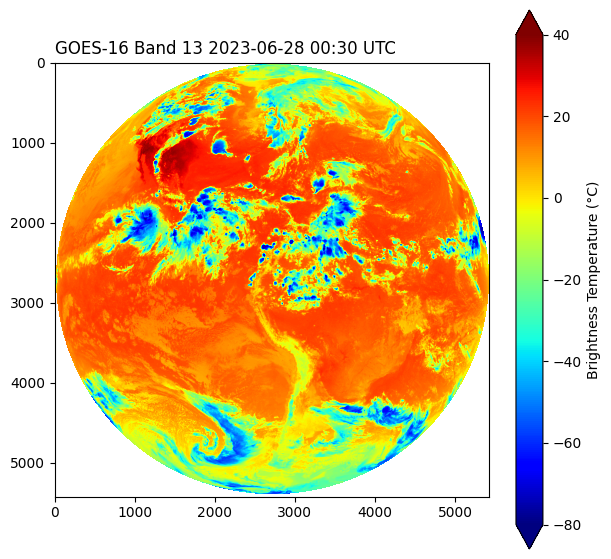

In [ ]:
file = Dataset("/content/OR_ABI-L2-CMIPF-M6C13_G16_s20231790030207_e20231790039527_c20231790039594.nc")

data = file.variables['CMI'][:] - 273.15 #To Celsius

plt.figure(figsize=(7,7))
plt.imshow(data, vmin=-80, vmax=40, cmap='jet')
plt.colorbar(label='Brightness Temperature (°C)', extend='both')

date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
plt.title(f"GOES-16 Band 13 {date.strftime('%Y-%m-%d %H:%M')} UTC", loc='left')

plt.savefig(f'/content/goes13_{date}.png')
plt.show()

# Getting started with Folium

In [ ]:
import pandas as pd
pontos = {'lat': [-8.044355,-8.045071, -8.045351, -8.044688],	'lon': [-34.875557, -34.876049, -34.875596, -34.875131]}
apac = pd.DataFrame(data=pontos)
apac


,lat,lon
0,-8.044355,-34.875557
1,-8.045071,-34.876049
2,-8.045351,-34.875596
3,-8.044688,-34.875131


In [ ]:
import folium
map = folium.Map(location = apac.iloc[0], zoom_start = 20)
for _, local in apac.iterrows():
  folium.Marker(location=[local['lat'], local['lon']],
                popup =
                            "Latitude: " + str(local['lat']) + '<br>' +
                            "Longitude: " + str(local['lon']),
                tooltip='Detalhes').add_to(map)

map